# Orange Quality Analysis

# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA
from scipy.stats import entropy

# load the dataset
from collections import Counter
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier

# Functions

In [73]:
from sklearn.ensemble import AdaBoostClassifier


def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
        "LDA":LinearDiscriminantAnalysis(),
        "GPC":GaussianProcessClassifier(),
        "Ada": AdaBoostClassifier()
    }

    # Create an empty DataFrame to store model performance
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        model_performance.append({
            "Model": name,
            "Accuracy": accuracy
        })

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=0)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    model_performance.append({
        "Model": "Sequential",
        "Accuracy": accuracy
    })

    # Convert the model_performance to a DataFrame
    return pd.DataFrame(model_performance)

def automate_pca(pca_components, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
  pca = PCA(n_components=pca_components)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)
  
  models = run_all_models(X_train_pca, X_test_pca, y_train_encoded, y_test_encoded)
  print(models)
  
def labels_to_probabilities(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return probabilities

def calculate_entropy(df:pd.DataFrame)-> pd.DataFrame:
  """_summary_

  Args:
      df (pd.DataFrame): _description_

  Returns:
      pd.DataFrame: _description_
  """

  column_entropy_info = {}
  for col in df.columns:
    probabilities = labels_to_probabilities(df[col])
    entropy_value = entropy(probabilities, base=2)
    column_entropy_info[col] = {
          'entropy': entropy_value
      }

  return pd.DataFrame(column_entropy_info)

# EDA Analysis

In [3]:
df = pd.read_csv("data.csv")
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [4]:
df.dtypes

Size (cm)             float64
Weight (g)              int64
Brix (Sweetness)      float64
pH (Acidity)          float64
Softness (1-5)        float64
HarvestTime (days)      int64
Ripeness (1-5)        float64
Color                  object
Variety                object
Blemishes (Y/N)        object
Quality (1-5)         float64
dtype: object

In [5]:
df.isna().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df["Variety"].value_counts()

Variety
Cara Cara                21
Temple                   18
Star Ruby                18
Navel                    16
Moro (Blood)             16
Tangerine                14
Clementine               14
Washington Navel         14
Satsuma Mandarin         13
Ortanique (Hybrid)       13
Minneola (Hybrid)        12
Jaffa                    11
Ambiance                 11
Valencia                 11
California Valencia       7
Honey Tangerine           7
Hamlin                    5
Midsweet (Hybrid)         5
Clementine (Seedless)     4
Murcott (Hybrid)          3
Navel (Late Season)       3
Blood Orange              2
Navel (Early Season)      2
Tangelo (Hybrid)          1
Name: count, dtype: int64

In [8]:
df["Color"].value_counts()

Color
Deep Orange      75
Light Orange     64
Orange-Red       55
Orange           38
Yellow-Orange     9
Name: count, dtype: int64

In [9]:
df["Blemishes (Y/N)"].value_counts()

Blemishes (Y/N)
N                          149
Y (Sunburn Patch)           23
Y (Scars)                   17
Y (Minor)                   14
Y (Mold Spot)               10
Y (Bruising)                 9
Y (Split Skin)               8
Y (Minor Insect Damage)      6
Y (Sunburn)                  2
Y (Bruise)                   1
N (Minor)                    1
N (Split Skin)               1
Name: count, dtype: int64

In [10]:
cat_cols = df.select_dtypes(include="object")

In [14]:
target = df.values[:,-1]
counter = Counter(target)

for k,v in counter.items():
  per = v/len(target) * 100
  print("Class=%d, Count=%d, Percentage=%.3f%%" % (k,v,per))

Class=4, Count=76, Percentage=31.535%
Class=4, Count=29, Percentage=12.033%
Class=5, Count=52, Percentage=21.577%
Class=3, Count=23, Percentage=9.544%
Class=1, Count=9, Percentage=3.734%
Class=3, Count=26, Percentage=10.788%
Class=2, Count=12, Percentage=4.979%
Class=2, Count=14, Percentage=5.809%


# Visuals

<Axes: xlabel='Quality (1-5)'>

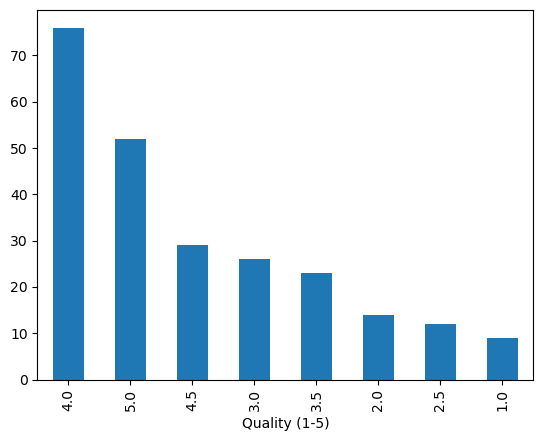

In [15]:
df["Quality (1-5)"].value_counts().plot.bar()

In [25]:
test_df = df[["Blemishes (Y/N)", "Variety", "Color", "Quality (1-5)"]]

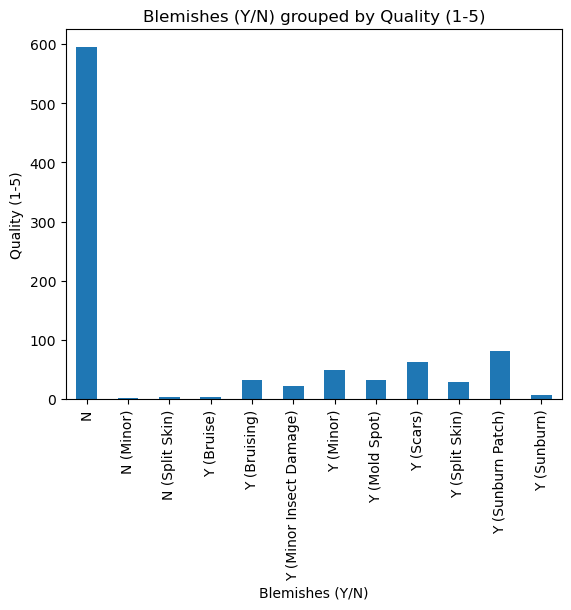

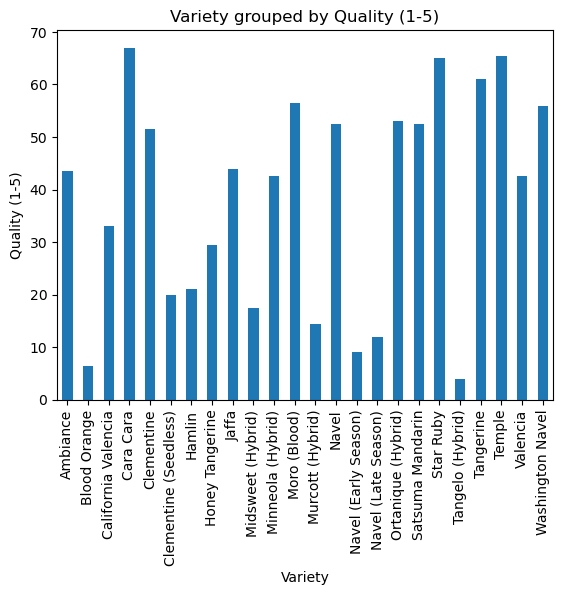

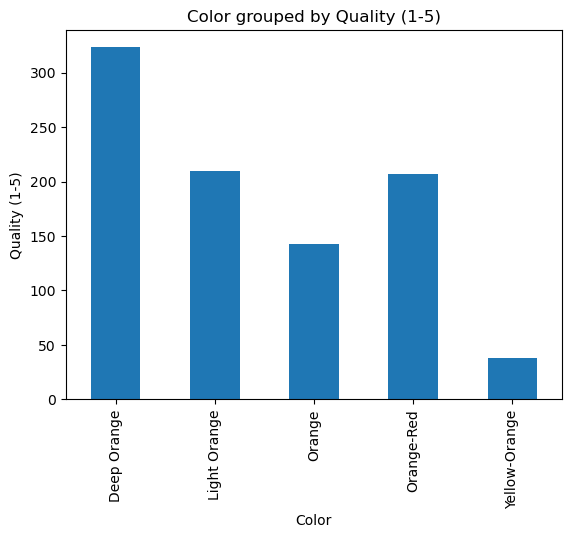

In [29]:

interested_columns = test_df.columns[:-1]

for col in interested_columns:
  grouped_df = test_df.groupby(col)["Quality (1-5)"].sum()
  grouped_df.plot(kind="bar", x =col, y ="Quality (1-5)")
  plt.title(f"{col} grouped by Quality (1-5)")
  plt.xlabel(f"{col}")
  plt.ylabel("Quality (1-5)")
  plt.show()

In [34]:
test_df.sort_values("Quality (1-5)",ascending=False)

,Blemishes (Y/N),Variety,Color,Quality (1-5)
51,N,Satsuma Mandarin,Light Orange,5.0
193,N,Star Ruby,Deep Orange,5.0
69,N,Temple,Deep Orange,5.0
112,Y (Split Skin),Ambiance,Orange-Red,5.0
189,Y (Split Skin),Star Ruby,Deep Orange,5.0
...,...,...,...,...
199,N,Washington Navel,Light Orange,1.0
119,N,Satsuma Mandarin,Light Orange,1.0
5,N,Navel,Orange,1.0
212,N,Minneola (Hybrid),Light Orange,1.0


In [64]:
int_values = df.select_dtypes(include=["int64","float64"])
int_values

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,2
1,8.2,220,10.5,3.4,3.0,14,4.5,2
2,6.8,150,14.0,3.0,1.0,7,5.0,2
3,9.0,250,8.5,3.8,4.0,21,3.5,1
4,8.5,210,11.5,3.3,2.5,12,5.0,2
...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,2
237,7.4,275,8.5,3.5,5.0,20,5.0,2
238,7.5,196,15.7,3.0,3.0,13,3.0,2
239,7.2,251,9.8,4.3,3.0,23,1.0,1


/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_62978/2941147643.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_62978/2941147643.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_62978/2941147643.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_62978/2941147643.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_62978/2941147643.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_62978/2941147643.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_62978/29411

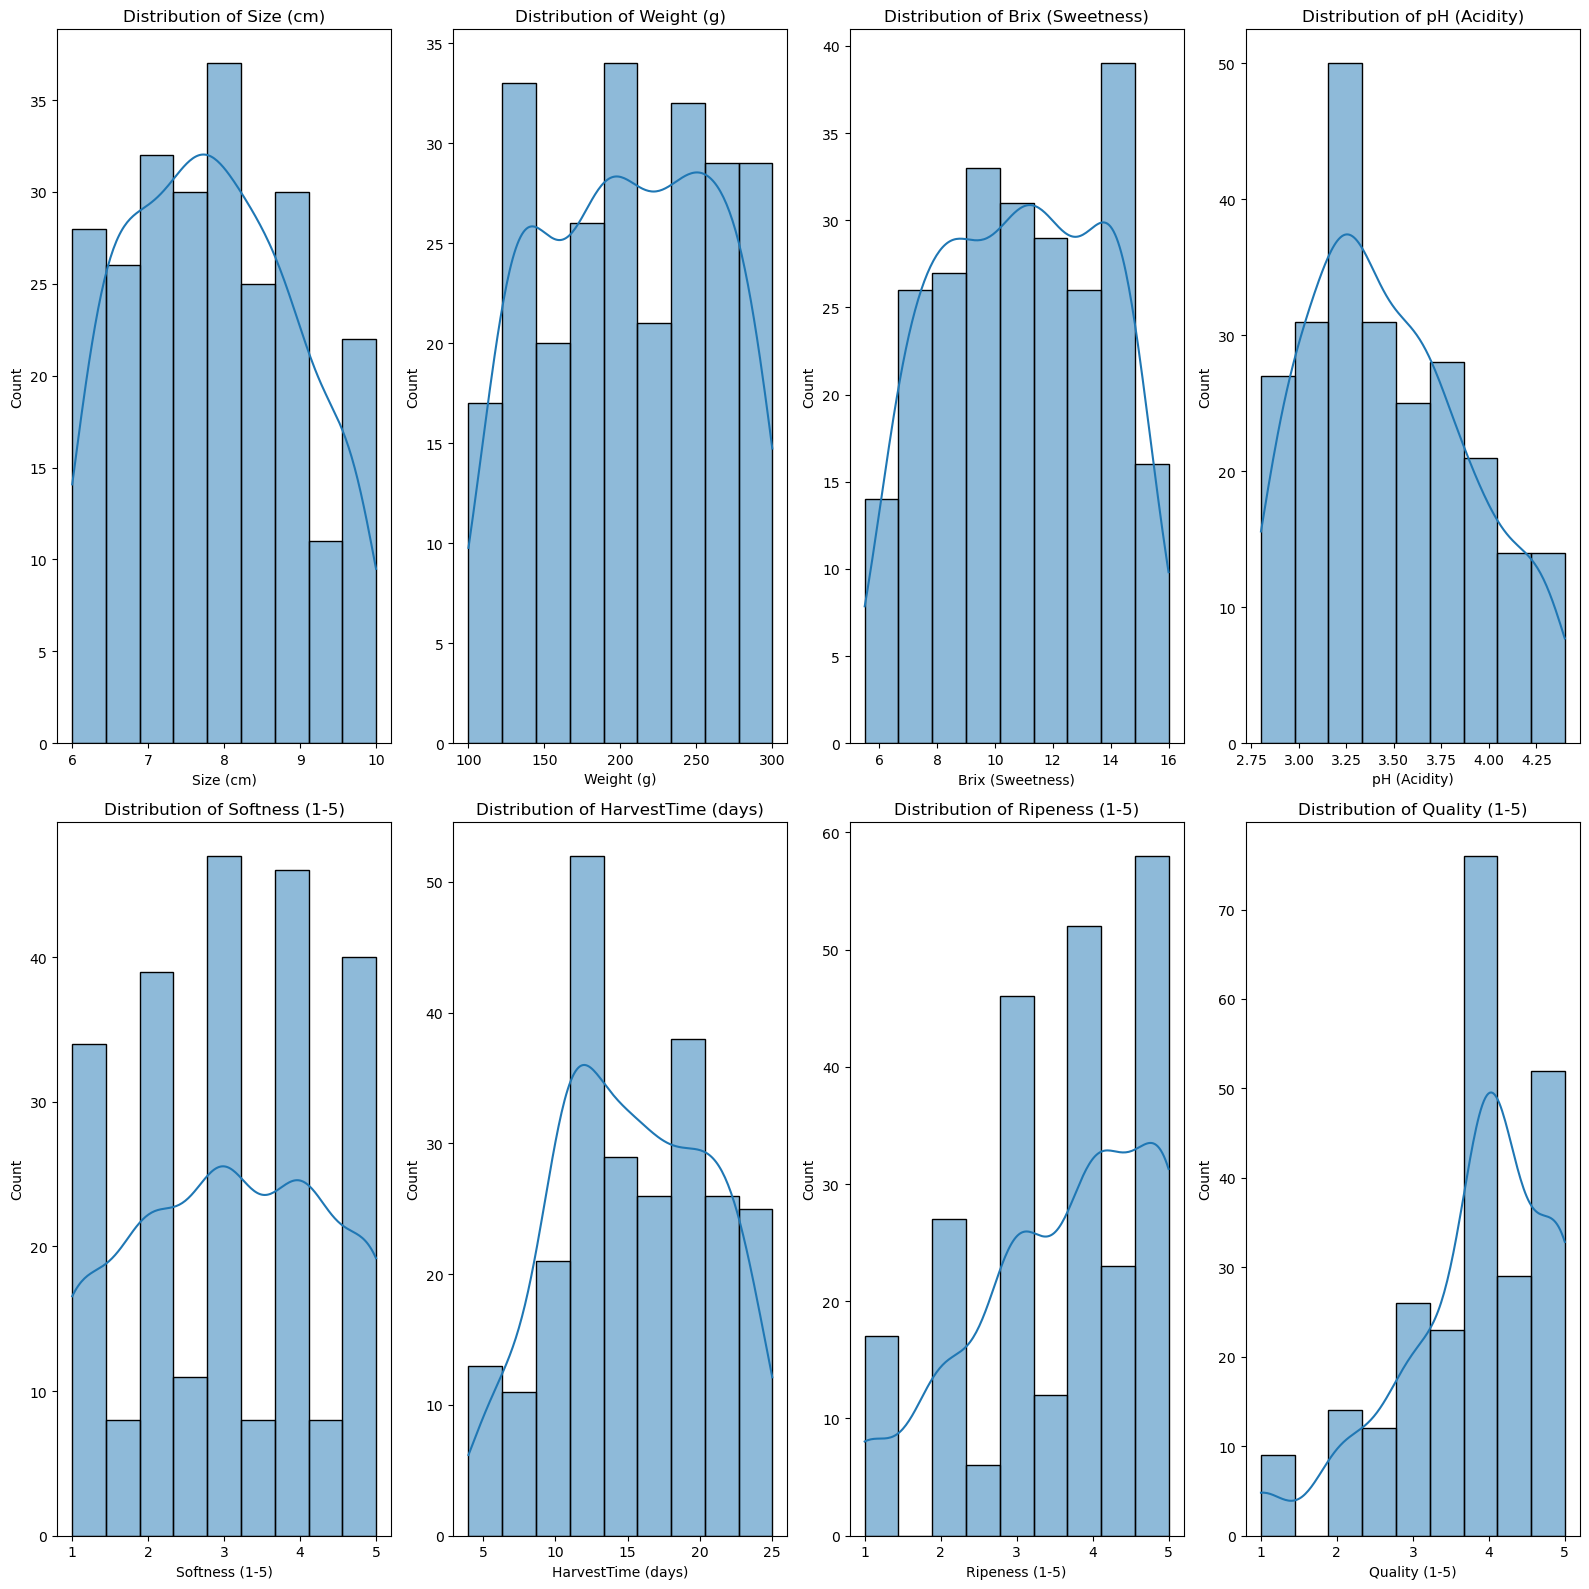

In [46]:
col_values = len(int_values.columns)
rows = (col_values +3)//4
plt.figure(figsize=(16,16))

for idx, col in enumerate(int_values.columns):
  plt.subplot(rows,4, idx+1)
  sns.histplot(int_values[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.tight_layout()
  plt.plot()

/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_62978/2665329743.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_62978/2665329743.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_62978/2665329743.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_62978/2665329743.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_62978/2665329743.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_62978/2665329743.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_62978/26653

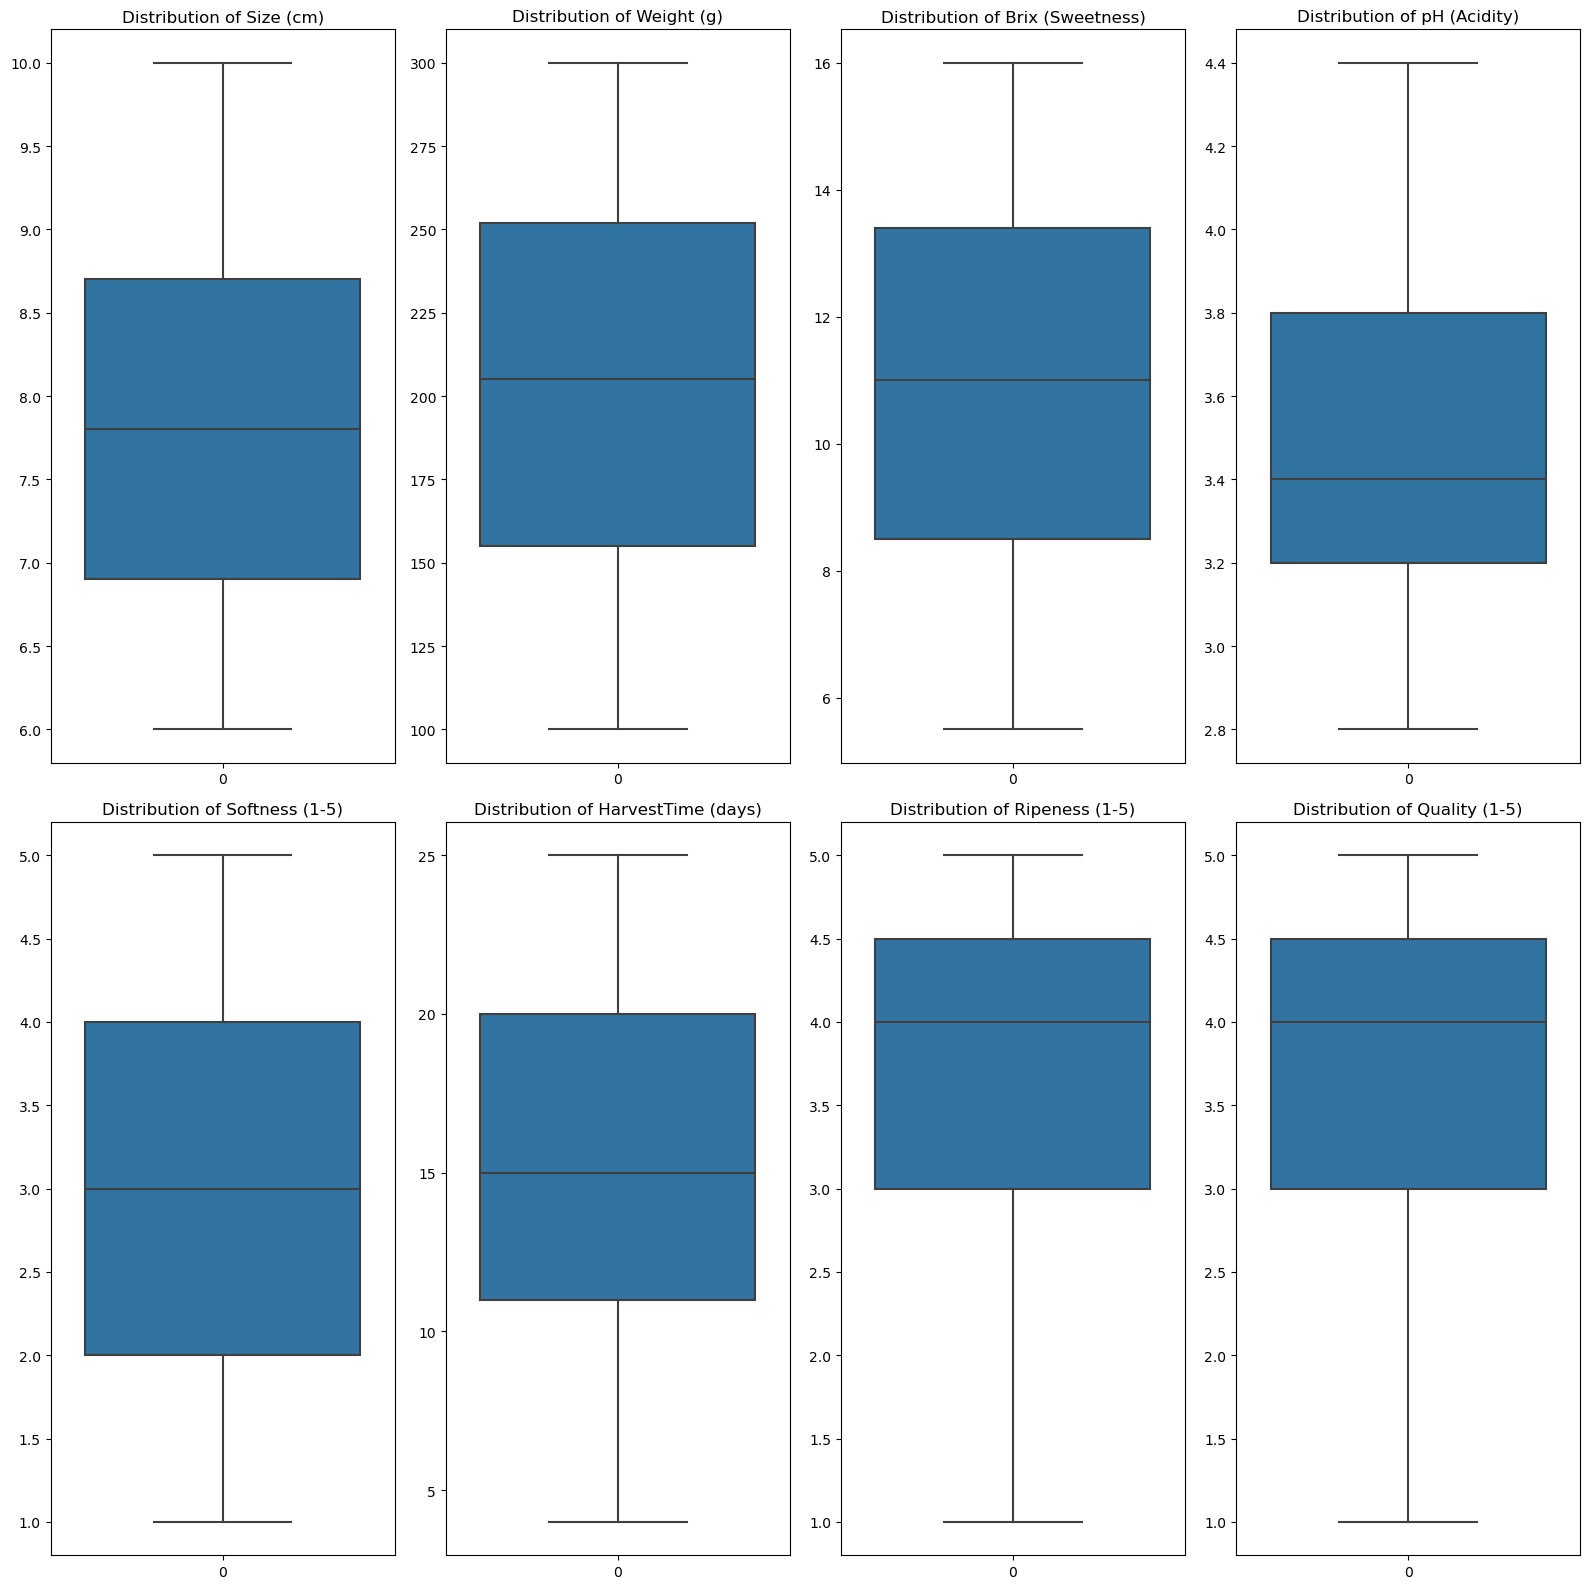

In [48]:
plt.figure(figsize=(16,16))

for idx, col in enumerate(int_values.columns):
  plt.subplot(rows,4, idx+1)
  sns.boxplot(int_values[col])
  plt.title(f"Distribution of {col}")
  plt.tight_layout()
  plt.plot()

<Axes: >

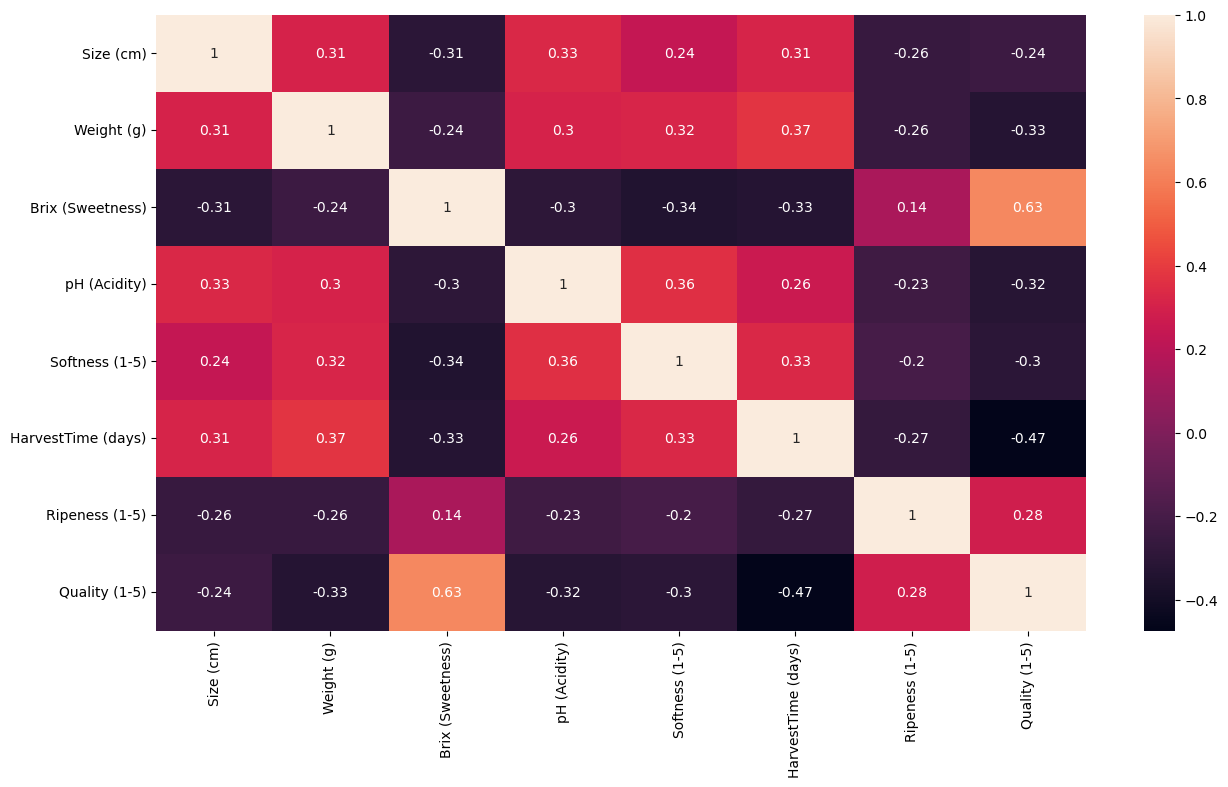

In [50]:
relations = int_values.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=relations, annot=True)

## Could this dataset benefit from dimesion reduction? Also how scientific is this process in terms of rating the quality of the fruit? Could this be better served as a classification problem rather than a regression problem?

<Axes: xlabel='Quality (1-5)', ylabel='Brix (Sweetness)'>

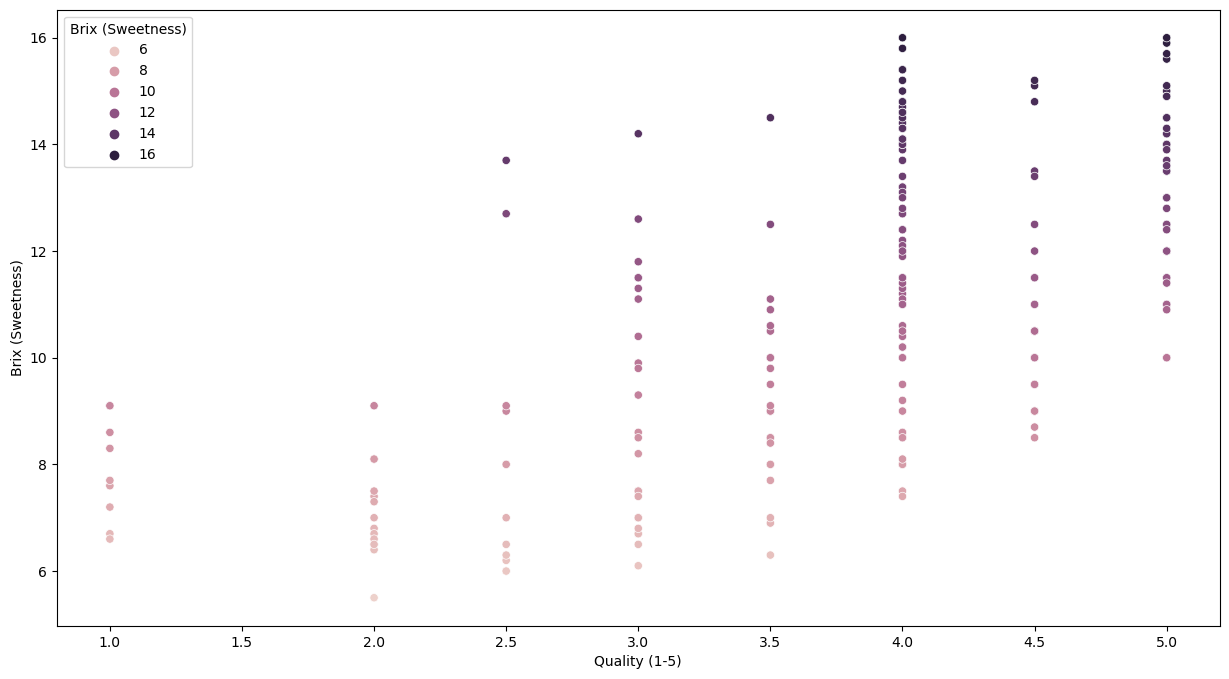

In [51]:
plt.figure(figsize=(15,8))
sns.scatterplot(data =df, x="Quality (1-5)", y="Brix (Sweetness)", hue ="Brix (Sweetness)")

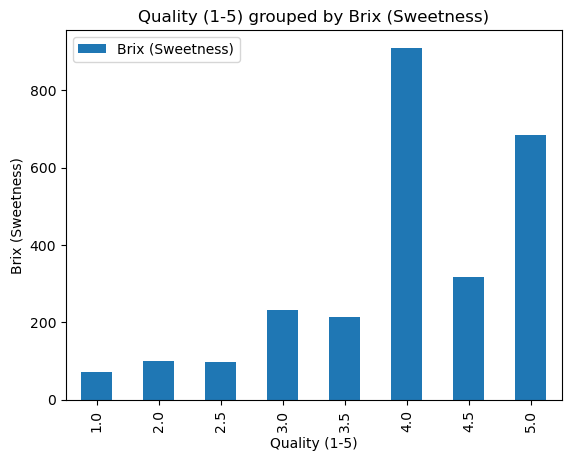

In [52]:
grouped_df = df.groupby("Quality (1-5)")["Brix (Sweetness)"].sum().reset_index()

grouped_df.plot(kind="bar", x ="Quality (1-5)", y ="Brix (Sweetness)")
plt.title("Quality (1-5) grouped by Brix (Sweetness)")
plt.xlabel("Quality (1-5)")
plt.ylabel("Brix (Sweetness)")
plt.show()

## Oranges rated from 4.0 - 4.5 represent roughly 43% of the dataset

# Data Preparation

In [56]:
df["Quality (1-5)"] = df["Quality (1-5)"].apply(lambda x: 0 if x>= 1.0 and x <=2.0 else 1 if x>2.0 and x<= 3.5 else 2)

In [59]:
df["Quality (1-5)"].value_counts()

Quality (1-5)
2    157
1     61
0     23
Name: count, dtype: int64

# Model Evaluation

In [67]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse=False)

encoded_data = encoder.fit_transform(df[cat_cols.columns])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols.columns))

df.reset_index(drop=True, inplace=True)

df = pd.concat([encoded_df, df], axis=1)

df.drop(cat_cols.columns, inplace=True, axis=1)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.metrics import fbeta_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# evaluate a model
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)
  return scores

last_ix = len(df.columns) - 1
X, y = df.drop(df.columns[last_ix], axis=1), df[df.columns[last_ix]]
model = DummyClassifier(strategy='uniform')
pipeline = Pipeline(steps=[('s',StandardScaler()),('m',model)])
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean accuracy: 0.341 (0.091)


## Baseline performance for accuracy should be better than 0.34%

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
models = run_all_models(X_train_scaled, X_test_scaled, y_train, y_test)
models.sort_values(by="Accuracy", ascending=False)

2/2 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1837


,Model,Accuracy
5,GradientBoostingClassifier,0.816327
0,LogisticRegression,0.795918
1,SVC,0.795918
3,RandomForestClassifier,0.795918
2,DecisionTreeClassifier,0.755102
7,LDA,0.755102
8,GPC,0.714286
4,KNeighborsClassifier,0.693878
9,Ada,0.653061
6,GaussianNB,0.346939


# Advanced Model Metrics

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score

# evaluate a model
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  
  metric = make_scorer(accuracy_score)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
  return scores

# define models to test
def get_models():
  models, names = list(), list()
  # LDA
  models.append(LinearDiscriminantAnalysis()) 
  names.append('LDA')
  # RFC
  models.append(RandomForestClassifier())
  names.append('RFC')
  # GBC
  models.append(GradientBoostingClassifier())
  names.append('GBC')
  # SVC
  models.append(SVC())
  names.append('SVC')
  # LR
  models.append(LogisticRegression())
  names.append('LR')
  #DTC
  models.append(DecisionTreeClassifier())
  names.append('DTC')
  
  return models, names

last_ix = len(df.columns)-1
X, y = df.drop(df.columns[last_ix], axis=1), df[df.columns[last_ix]]
models, names = get_models()
# evaluate each model
for i in range(len(models)):
  # Wrap the model in a pipeline with StandardScaler
  pipeline = Pipeline(steps=[('scaler', StandardScaler()), ("power_tranformer",PowerTransformer()), ('model', models[i])])
  # Evaluate the model
  scores = evaluate_model(X, y, pipeline)  # Replace X, y with your data
  # summarize and store
  print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>LDA 0.754 (0.067)
>RFC 0.795 (0.054)
>GBC 0.788 (0.061)
>SVC 0.751 (0.065)
>LR 0.762 (0.066)
>DTC 0.754 (0.069)


## RFC and GBC have the highest average and lowest STD on multiple subsets of data. Giving us high confidence in repeat performances

Model: RFC, Accuracy: 0.780


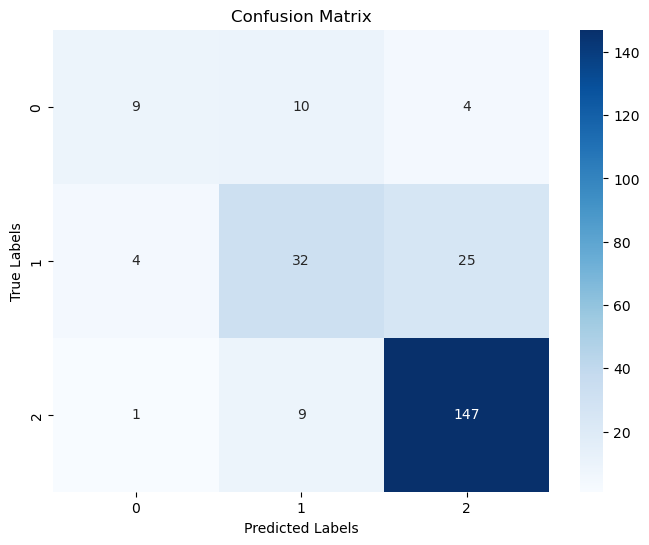

Model: GBC, Accuracy: 0.788


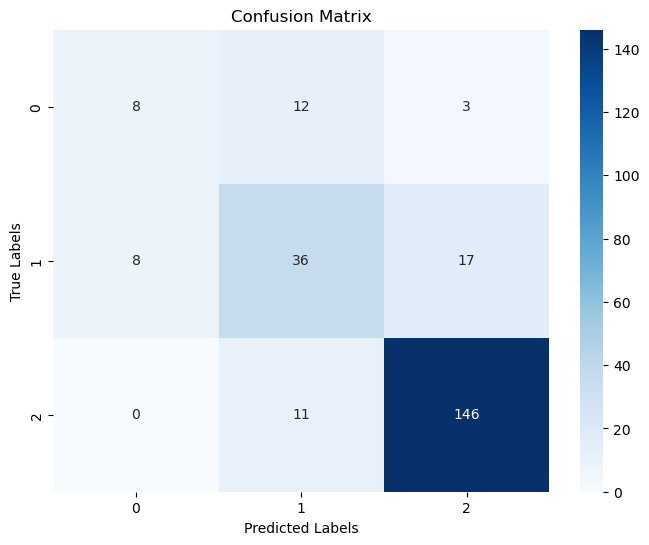

Model: LR, Accuracy: 0.743


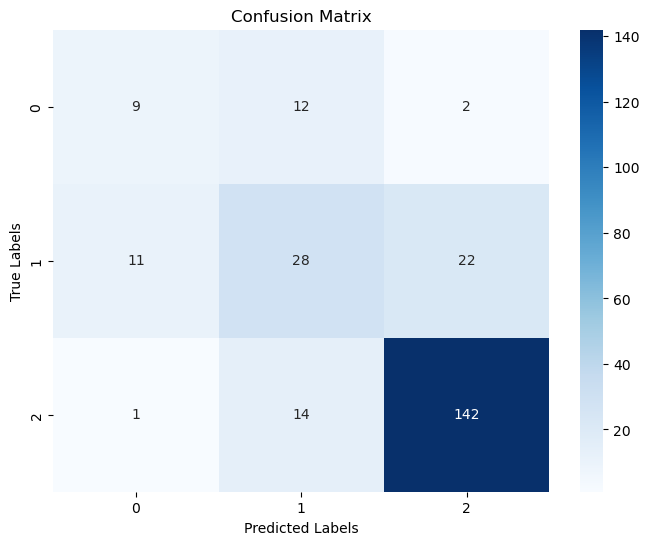

  Model  Accuracy
0   RFC  0.780083
1   GBC  0.788382
2    LR  0.742739


In [77]:
from sklearn.calibration import cross_val_predict

# define models to test
def get_models():
  models, names = list(), list()
  # RFC
  models.append(RandomForestClassifier())
  names.append('RFC')
  # GBC
  models.append(GradientBoostingClassifier())
  names.append('GBC')
  # LR
  models.append(LogisticRegression())
  names.append('LR')
  return models, names

models, names = get_models()
model_performance = []
for i in range(len(models)):
    pipeline = Pipeline([
        ('scaler', StandardScaler()), 
        ('power_transformer', PowerTransformer()), 
        ('model', models[i])
    ])
    
    y_pred = cross_val_predict(pipeline, X, y, cv=10) 

    # Compute the desired metrics
    accuracy = accuracy_score(y, y_pred)

    model_performance.append({
        "Model": names[i],
        "Accuracy": accuracy,
    })

    print(f"Model: {names[i]}, Accuracy: {accuracy:.3f}")
    
    # Generate the confusion matrix
    conf_mat = confusion_matrix(y, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Convert the model_performance to a DataFrame for easier analysis
performance_df = pd.DataFrame(model_performance)
print(performance_df)

# Conclusion

## Manipulating the 'Quality (1-5)' column came with benefits as opposed to a regression problem. I am left wondering how the scoring is done per orange? Are there subject matter experts who rate each orange manually? Is there an image classification problem? I am curious to know how much human biases in inputted in the assesments of each orange and the variation within each assessment. 

## Overall a very fun dataset, thank you

# Part Two Regression Analysis

In [3]:
df = pd.read_csv("data.csv")
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import make_scorer, mean_absolute_error

# evaluate a model
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  # evaluate model
  metric = make_scorer(mean_absolute_error, greater_is_better=False)
  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
  return scores

last_ix = len(df.columns) - 1
X, y = df.drop(df.columns[last_ix], axis=1), df[df.columns[last_ix]]

numeric_features = X.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_features = X.select_dtypes(include="object").columns.tolist()

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
cat_transformer = Pipeline(steps=[("encoder", OneHotEncoder())])

model = DummyRegressor(strategy="mean")

preprocessor = ColumnTransformer(
  transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", cat_transformer, cat_features)
  ]
)
pipeline = Pipeline(steps=[("preprocessor", preprocessor),('m',model)])
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean accuracy: -0.793 (0.122)


## Advanced Model Metrics

In [77]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PowerTransformer

def get_models():
  models, names = list(), list()
  # RFC
  models.append(RandomForestRegressor())
  names.append('RFR')
  # GBC
  models.append(GradientBoostingRegressor())
  names.append('GBR')
  # SVC
  models.append(SVR())
  names.append('SVR')
  # LR
  models.append(LinearRegression())
  names.append('LR')
  #DTC
  models.append(DecisionTreeRegressor())
  names.append('DTR')
  # XGB
  models.append(XGBRegressor())
  names.append('XGB')
  
  return models, names

# evaluate a model
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  # evaluate model
  metric = make_scorer(mean_absolute_error, greater_is_better=False)
  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
  return scores

last_ix = len(df.columns) - 1
X, y = df.drop(df.columns[last_ix], axis=1), df[df.columns[last_ix]]

numeric_features = X.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_features = X.select_dtypes(include="object").columns.tolist()

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler()), ("power_transformer",PowerTransformer())])
cat_transformer = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
  transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", cat_transformer, cat_features)
  ]
)

models, names = [], []
models, names = get_models()
for i in range(len(models)):
  pipeline = Pipeline(steps=[("preprocessor", preprocessor),('m',models[i])])
  # Evaluate the model
  scores = evaluate_model(X, y, pipeline)  # Replace X, y with your data
  # summarize and store
  print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>RFR -0.419 (0.102)
>GBR -0.461 (0.097)
>SVR -0.439 (0.089)
>LR -0.522 (0.070)
>DTR -0.519 (0.140)
>XGB -0.448 (0.111)


In [101]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

def get_models():
  models, names = list(), list()
  # RFC
  models.append(RandomForestRegressor())
  names.append('RFR')
  # GBC
  models.append(GradientBoostingRegressor())
  names.append('GBR')
  # SVC
  models.append(SVR())
  names.append('SVR')
  #DTC
  models.append(DecisionTreeRegressor())
  names.append('DTR')
  # XGB
  models.append(XGBRegressor())
  names.append('XGB')
  
  return models, names
  

last_ix = len(df.columns) - 1
X, y = df.drop(df.columns[last_ix], axis=1), df[df.columns[last_ix]]

numeric_features = X.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_features = X.select_dtypes(include="object").columns.tolist()

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler()), ("power_transformer",PowerTransformer())])
cat_transformer = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
  transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", cat_transformer, cat_features)
  ]
)

models, names = [], []
models, names = get_models()
params = [{
    'm__n_estimators': [100, 200],
    'm__max_depth': [None, 10, 20],
    'm__min_samples_split': [2, 5],
    'm__min_samples_leaf': [1, 2]
},
{
    'm__n_estimators': [100, 200],
    'm__learning_rate': [0.01, 0.1],
    'm__max_depth': [3, 5, 7]
},
{
    'm__C': [1, 10],
    'm__gamma': ['scale', 'auto'],
    'm__kernel': ['rbf', 'linear']
},
{
    'm__max_depth': [None, 10, 20],
    'm__min_samples_split': [2, 5],
    'm__min_samples_leaf': [1, 2]
},
{
    'm__n_estimators': [100, 200],
    'm__learning_rate': [0.01, 0.1],
    'm__max_depth': [3, 5, 7],
    'm__min_child_weight': [1, 2]
}
]

best_models = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
for i, model in enumerate(models):
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ('m', model)])
    grid_search = GridSearchCV(estimator=pipeline, param_grid=params[i], cv=10, n_jobs=-1, scoring='neg_mean_absolute_error', return_train_score=True)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    # Evaluate on the test set
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Model: {names[i]}")
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation MAE:", -grid_search.best_score_)  # Note: negative sign because scoring is neg_mean_squared_error
    print("Test MAE:", mae)
    print("-------------------------------------------------")


Model: RFR
Best parameters: {'m__max_depth': 20, 'm__min_samples_leaf': 1, 'm__min_samples_split': 2, 'm__n_estimators': 200}
Best cross-validation MAE: 0.43831066176470584
Test MAE: 0.45883561643835613
-------------------------------------------------
Model: GBR
Best parameters: {'m__learning_rate': 0.1, 'm__max_depth': 7, 'm__n_estimators': 100}
Best cross-validation MAE: 0.4694013396673128
Test MAE: 0.4313735055007909
-------------------------------------------------
Model: SVR
Best parameters: {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'rbf'}
Best cross-validation MAE: 0.44490817028263174
Test MAE: 0.4469919002729739
-------------------------------------------------
Model: DTR
Best parameters: {'m__max_depth': 20, 'm__min_samples_leaf': 2, 'm__min_samples_split': 5}
Best cross-validation MAE: 0.4899662990196078
Test MAE: 0.603310502283105
-------------------------------------------------
Model: XGB
Best parameters: {'m__learning_rate': 0.1, 'm__max_depth': 5, 'm__min_child_weigh

In [102]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('power_transformer',
                                                                   PowerTransformer())]),
                                                  ['Size (cm)', 'Weight (g)',
                                                   'Brix (Sweetness)',
                                                   'pH (Acidity)',
                                                   'Softness (1-5)',
                                                   'HarvestTime (days)',
                                                   'Ripeness (1-5)']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Colo...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None, min_child_weight=1,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=200,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=None, ...))])